In [1]:
import pandas as pd
from pandas.tseries.offsets import DateOffset

In [2]:
# PRIMARY STARTING DATAFRAME
ticker = "ETH-USD"
inter = "5m" #crypto has to be every 5 minutes while stocks is 1m

df = pd.read_csv(f"{ticker}_prices_{inter}.csv", parse_dates=True, infer_datetime_format=True)
df = df.set_index(pd.DatetimeIndex(df['Datetime']), drop=True, append=False, inplace=False, verify_integrity=False)


In [3]:
# CLEANED/SIMPLIFIED DATAFRAME

# New dataframe for this specific technique.  Consists of OHLC only
ohlc_df = df[['Open', 'High', 'Low', 'Close']]

# slice the dataframe down to a small dataset to run the calculations very quickly
# ohlc_df = ohlc_df.iloc[2340:2350,:]
ohlc_df

,Open,High,Low,Close
Datetime,,,,
2022-01-06 05:00:00+00:00,3458.27,3458.27,3453.92,3453.92
2022-01-06 05:05:00+00:00,3455.96,3464.21,3455.96,3464.21
2022-01-06 05:10:00+00:00,3470.80,3470.80,3468.58,3469.46
2022-01-06 05:15:00+00:00,3469.29,3473.64,3469.29,3473.64
2022-01-06 05:20:00+00:00,3474.18,3476.43,3474.18,3475.47
...,...,...,...,...
2022-01-09 04:35:00+00:00,3133.38,3135.46,3133.38,3135.24
2022-01-09 04:40:00+00:00,3135.76,3137.51,3135.76,3136.60
2022-01-09 04:45:00+00:00,3136.39,3136.39,3133.95,3136.14


In [4]:
# CREATING BUY/SELL SIGNAL

# Calculate the daily returns using the closing prices and the pct_change function
ohlc_df["Actual_Returns"] = ohlc_df["Close"].pct_change()

# Creating the Signal column
ohlc_df["Signal"] = 0

# Create the Signal to buy
ohlc_df.loc[(ohlc_df["Actual_Returns"] >= 0), "Signal"] = 1

# Create the Signal to sell
ohlc_df.loc[(ohlc_df["Actual_Returns"] < 0), "Signal"] = -1

# Drop all NaN values from the DataFrame
ohlc_df = ohlc_df.dropna()


# Review the DataFrame
display(ohlc_df.head())
display(ohlc_df.tail())

C:\Users\Sarah\AppData\Local\Temp/ipykernel_24472/278010266.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlc_df["Actual_Returns"] = ohlc_df["Close"].pct_change()
C:\Users\Sarah\AppData\Local\Temp/ipykernel_24472/278010266.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlc_df["Signal"] = 0
C:\Users\Sarah\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,Open,High,Low,Close,Actual_Returns,Signal
Datetime,,,,,,
2022-01-06 05:05:00+00:00,3455.96,3464.21,3455.96,3464.21,0.002979,1
2022-01-06 05:10:00+00:00,3470.80,3470.80,3468.58,3469.46,0.001515,1
2022-01-06 05:15:00+00:00,3469.29,3473.64,3469.29,3473.64,0.001205,1
2022-01-06 05:20:00+00:00,3474.18,3476.43,3474.18,3475.47,0.000527,1
2022-01-06 05:25:00+00:00,3474.05,3478.62,3474.05,3478.62,0.000906,1


,Open,High,Low,Close,Actual_Returns,Signal
Datetime,,,,,,
2022-01-09 04:35:00+00:00,3133.38,3135.46,3133.38,3135.24,0.000578,1
2022-01-09 04:40:00+00:00,3135.76,3137.51,3135.76,3136.60,0.000434,1
2022-01-09 04:45:00+00:00,3136.39,3136.39,3133.95,3136.14,-0.000147,-1
2022-01-09 04:50:00+00:00,3136.28,3139.01,3136.28,3139.01,0.000915,1
2022-01-09 04:55:00+00:00,3137.94,3138.18,3137.22,3137.28,-0.000551,-1


In [5]:
# GENERATING OUR FEATURES (X) DATASET, OHLC

X = ohlc_df.iloc[:,:4]
X

,Open,High,Low,Close
Datetime,,,,
2022-01-06 05:05:00+00:00,3455.96,3464.21,3455.96,3464.21
2022-01-06 05:10:00+00:00,3470.80,3470.80,3468.58,3469.46
2022-01-06 05:15:00+00:00,3469.29,3473.64,3469.29,3473.64
2022-01-06 05:20:00+00:00,3474.18,3476.43,3474.18,3475.47
2022-01-06 05:25:00+00:00,3474.05,3478.62,3474.05,3478.62
...,...,...,...,...
2022-01-09 04:35:00+00:00,3133.38,3135.46,3133.38,3135.24
2022-01-09 04:40:00+00:00,3135.76,3137.51,3135.76,3136.60
2022-01-09 04:45:00+00:00,3136.39,3136.39,3133.95,3136.14


In [6]:
# GENERATING OUR TARGET (Y) DATASET, Signal

y = ohlc_df[['Signal']]

y.head()

,Signal
Datetime,
2022-01-06 05:05:00+00:00,1
2022-01-06 05:10:00+00:00,1
2022-01-06 05:15:00+00:00,1
2022-01-06 05:20:00+00:00,1
2022-01-06 05:25:00+00:00,1


In [7]:
# SPLITTING OUT DATA FOR TRAINGIN AND TESTING

# Select the start of the training period
training_begin = X.index.min()

# Select the ending period for the training data with an offset 70% of the total rows
# We'll use the first 70% of the data for training.  Here one row = one minute.
seventy_pct_rows = (round(ohlc_df.shape[0]*.7)*5)
training_end = X.index.min() + DateOffset(minutes=seventy_pct_rows)

# Display the training begin and end dates
print(f'Trading Begins: {training_begin}')
print(f'Trading Ends: {training_end}')

Trading Begins: 2022-01-06 05:05:00+00:00
Trading Ends: 2022-01-08 04:25:00+00:00


In [8]:
# SETTING OUR X AND Y TRAINING & TESTING DATA

# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]



# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

# Display sample X train and X test data
print('X Train Dataframe')
display(X_train.head())
print('X Test Dataframe')
display(X_test.head())
print('Y Train Dataframe')
display(y_train.head())
print('Y Test Dataframe')
display(y_test.head())

X Train Dataframe


,Open,High,Low,Close
Datetime,,,,
2022-01-06 05:05:00+00:00,3455.96,3464.21,3455.96,3464.21
2022-01-06 05:10:00+00:00,3470.80,3470.80,3468.58,3469.46
2022-01-06 05:15:00+00:00,3469.29,3473.64,3469.29,3473.64
2022-01-06 05:20:00+00:00,3474.18,3476.43,3474.18,3475.47
2022-01-06 05:25:00+00:00,3474.05,3478.62,3474.05,3478.62


X Test Dataframe


,Open,High,Low,Close
Datetime,,,,
2022-01-08 04:25:00+00:00,3212.27,3214.72,3212.27,3214.45
2022-01-08 04:30:00+00:00,3214.26,3214.26,3209.39,3209.39
2022-01-08 04:35:00+00:00,3210.18,3212.92,3210.18,3212.87
2022-01-08 04:40:00+00:00,3215.18,3220.09,3215.18,3220.09
2022-01-08 04:45:00+00:00,3220.23,3220.97,3220.23,3220.97


Y Train Dataframe


,Signal
Datetime,
2022-01-06 05:05:00+00:00,1
2022-01-06 05:10:00+00:00,1
2022-01-06 05:15:00+00:00,1
2022-01-06 05:20:00+00:00,1
2022-01-06 05:25:00+00:00,1


Y Test Dataframe


,Signal
Datetime,
2022-01-08 04:25:00+00:00,1
2022-01-08 04:30:00+00:00,-1
2022-01-08 04:35:00+00:00,1
2022-01-08 04:40:00+00:00,1
2022-01-08 04:45:00+00:00,1


In [9]:
# STANDARDIZING THE DATA

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# INTRODUCE THE SVM MACHINE LEARNING MODEL

# Imports
from sklearn import svm
from sklearn.metrics import classification_report

svm_model = svm.SVC()
 
# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:10]


C:\Users\Sarah\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [11]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)
testing_signal_predictions[:10]


array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [12]:
# Evaluate the model's ability to predict the trading signal for the testing data
svm_testing_report = classification_report(y_test, testing_signal_predictions)
print(svm_testing_report)

              precision    recall  f1-score   support

          -1       0.51      0.54      0.53       149
           1       0.50      0.47      0.49       146

    accuracy                           0.51       295
   macro avg       0.51      0.51      0.51       295
weighted avg       0.51      0.51      0.51       295



In [13]:
# Create a new empty predictions DataFrame using code provided below.
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df["svm_signal"] = testing_signal_predictions
predictions_df["actual_returns"] = ohlc_df["Actual_Returns"]
predictions_df["trading_algorithm_returns"] = predictions_df["actual_returns"] * predictions_df["svm_signal"]
predictions_df.tail(40)

,svm_signal,actual_returns,trading_algorithm_returns
Datetime,,,
2022-01-09 01:40:00+00:00,1,0.000973,0.000973
2022-01-09 01:45:00+00:00,1,-0.000508,-0.000508
2022-01-09 01:50:00+00:00,1,-0.000074,-0.000074
2022-01-09 01:55:00+00:00,1,0.001929,0.001929
2022-01-09 02:00:00+00:00,1,0.001440,0.001440
2022-01-09 02:05:00+00:00,1,0.000513,0.000513
2022-01-09 02:10:00+00:00,1,0.000767,0.000767
2022-01-09 02:15:00+00:00,1,0.000869,0.000869
2022-01-09 02:20:00+00:00,1,0.001764,0.001764


<AxesSubplot:xlabel='Datetime'>

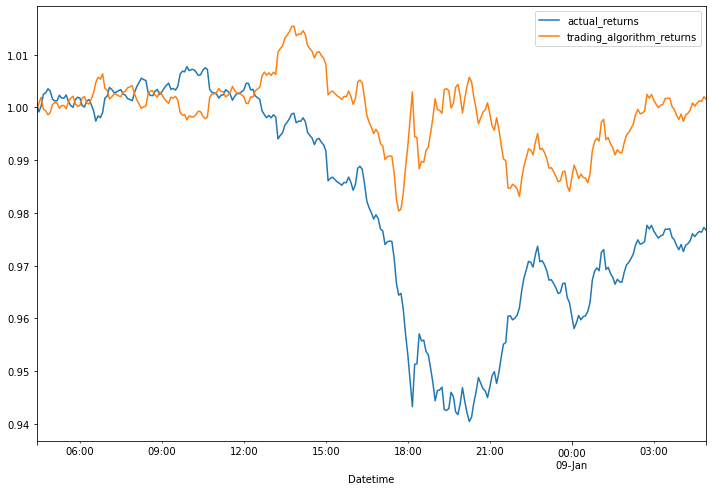

In [14]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot(figsize=(12, 8))


<AxesSubplot:xlabel='Datetime'>

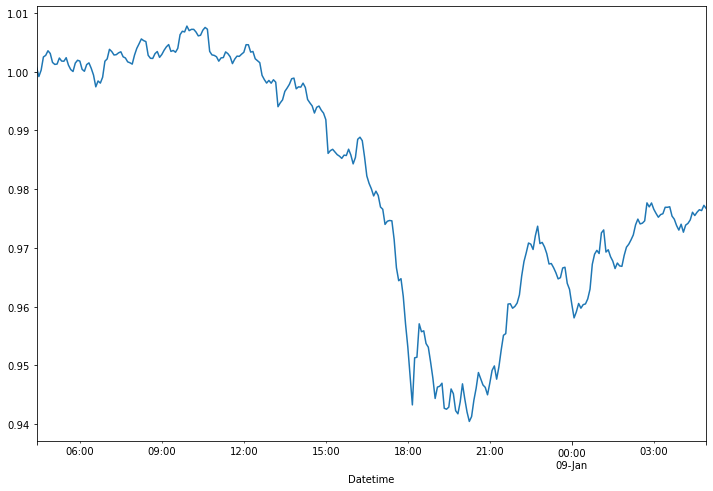

In [15]:
(1 + predictions_df['actual_returns']).cumprod().plot(figsize=(12, 8))


<AxesSubplot:xlabel='Datetime'>

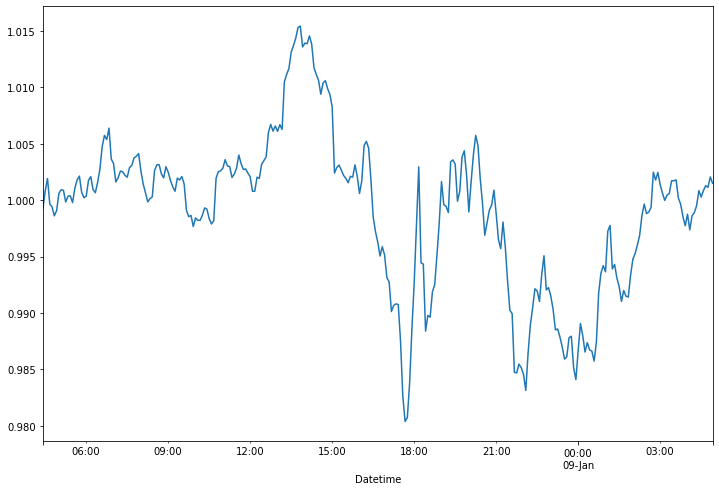

In [16]:
(1 + predictions_df['trading_algorithm_returns']).cumprod().plot(figsize=(12, 8))


In [17]:
# CREATE SVM SIGNAL TO EXPORT TO CSV

svm_signal_sf = predictions_df['svm_signal']

svm_signal_sf.to_csv("svm_signal.csv")